In [1]:
import numpy as np
np.set_printoptions(threshold=10000,suppress=True)
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')



In [2]:
data = pd.read_csv('./villes.csv', sep=';')
X = data.iloc[:, 1:].values
labels = data.iloc[:, 0].values
print("labels", labels)

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

SC = StandardScaler()
SC.fit(X)
Xnorm = SC.transform(X)


pca=PCA(n_components =12)
#print("pca",pca)
pca.fit(Xnorm)

X_pca = pca.transform(Xnorm)





labels ['ajac' 'ange' 'ango' 'besa' 'biar' 'bord' 'bres' 'cler' 'dijo' 'embr'
 'gren' 'lill' 'limo' 'lyon' 'mars' 'mont' 'nanc' 'nant' 'nice' 'nime'
 'orle' 'pari' 'perp' 'reim' 'renn' 'roue' 'stqu' 'stra' 'toul' 'tlse'
 'tour' 'vich']


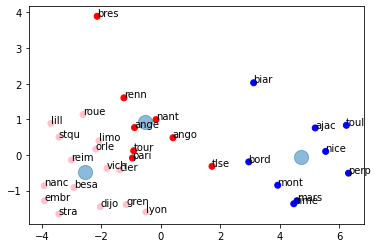

'\n\nprint("clustering", clustering, "map colors", mcolors.ListedColormap(colors))\n\nplt.scatter(X_pca[:, 0], X_pca[:, 1], c= clustering, cmap= mcolors.ListedColormap(colors))\nfor label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):\n    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords=\'offset points\')\nplt.show()\n\n'

In [3]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import matplotlib.colors as mcolors

clustering = KMeans(n_clusters=3, random_state=0).fit(X_pca)
y_kmeans = clustering.predict(X_pca)
n_clusters = 3
colors = ['red','yellow','blue','pink']


plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap= mcolors.ListedColormap(colors))

centers = clustering.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], cmap= mcolors.ListedColormap(colors), alpha=0.5, s=200 );

for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()


"""

print("clustering", clustering, "map colors", mcolors.ListedColormap(colors))

plt.scatter(X_pca[:, 0], X_pca[:, 1], c= clustering, cmap= mcolors.ListedColormap(colors))
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

"""



In [4]:
#clustering = AgglomerativeClustering().fit(X)
#ward.fit(X)